In [114]:
import tensorflow as tf
from keras.layers import Dense, Input, Dropout
from keras.models import Sequential
from keras.regularizers import l2

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

In [7]:
data = pd.read_csv('creditcard.csv')
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [15]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
data['Class'].value_counts()

Class
0.0    47301
1.0      146
Name: count, dtype: int64

In [20]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [24]:
null_rows = data[data.isnull().any(axis=1)].index
print(null_rows)

Index([47447], dtype='int64')


In [25]:
data = data.dropna()

In [26]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

C:\Users\shind\AppData\Local\Temp\ipykernel_18648\1905174061.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette="viridis")


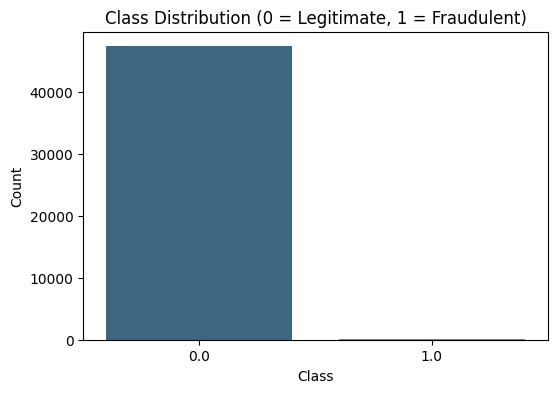

In [31]:
# Plot the distribution of 'Class'
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data, palette="viridis")
plt.title("Class Distribution (0 = Legitimate, 1 = Fraudulent)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

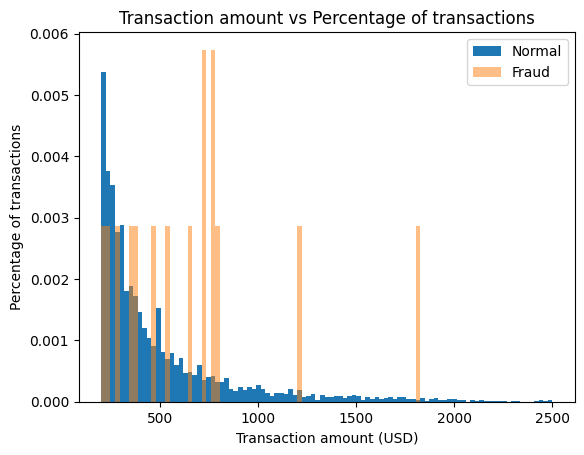

In [38]:
# Save the normal and fradulent transactions in separate dataframe
normal_dataset = data[data.Class == 0]
fraud_dataset = data[data.Class == 1]
#Visualize transactionamounts for normal and fraudulent transactions
bins = np.linspace(200, 2500, 100)
plt.hist(normal_dataset.Amount, bins=bins, alpha=1, density=True, label='Normal')
plt.hist(fraud_dataset.Amount, bins=bins, alpha=0.5, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Transaction amount vs Percentage of transactions")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions");
plt.show()

In [91]:
scaler = StandardScaler()
data['Time'] = scaler.fit_transform(data[['Time']])
data['Amount'] = scaler.fit_transform(data[['Amount']])

In [101]:
X = data.drop(['Class'], axis=1)
Y = data['Class']

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2021
)

In [146]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(37957, 30)
(37957,)
(9490, 30)
(9490,)


In [103]:
min_val, max_val = X_train.min(), X_train.max()
X_train = (X_train - min_val) / (max_val - min_val)
X_test = (X_test - min_val) / (max_val - min_val)

In [105]:
# Use only normal transactions (Class = 0) for training
# `Y_train` and `Y_test` are 0 for normal, 1 for fraud
X_train_normal = X_train[Y == 0]
X_test_normal = X_test[Y==0]
X_test_froud = X_test[Y==1]
print(X_train_normal.shape)
print(X_test_normal.shape)
print(X_test_froud.shape)

(37844, 30)
(9457, 30)
(33, 30)


C:\Users\shind\AppData\Local\Temp\ipykernel_18648\73592303.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train_normal = X_train[Y == 0]
C:\Users\shind\AppData\Local\Temp\ipykernel_18648\73592303.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_normal = X_test[Y==0]
C:\Users\shind\AppData\Local\Temp\ipykernel_18648\73592303.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_froud = X_test[Y==1]


In [107]:
# Convert data to TensorFlow float32 format
X_train_normal = tf.cast(X_train_normal, tf.float32)
X_test_normal = tf.cast(X_test_normal, tf.float32)
X_test_froud = tf.cast(X_test_froud, tf.float32)

In [ ]:
X = data.drop(['Class'], axis=1)
Y = data['Class']

In [133]:
# Parameters
epoch = 4
batch_size = 64
input_dim = 30  # Number of features
encoding_dim = 14  # Size of compressed representation
hidden_dim_1 = 7  # Hidden layer size for compression
hidden_dim_2 = 4  # Hidden layer size for compression
learning_rate = 1e-7  # Learning rate for L2 regularization

In [115]:
#input Layer
input_layer = Input(shape=(input_dim, ))

#Encoder
encoder = Dense(encoding_dim, activation="tanh",
                        activity_regularizer= l2(learning_rate)
               )(input_layer)
encoder= Dropout(0.2)(encoder)
encoder = Dense(hidden_dim_1, activation='relu')(encoder)
encoder = Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)

# Decoder
decoder = Dense(hidden_dim_1, activation='relu')(encoder)
decoder= Dropout(0.2)(decoder)
decoder = Dense(encoding_dim, activation='relu')(decoder)
decoder = Dense(input_dim, activation='tanh')(decoder)

#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 14)                  │             434 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │             450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,168 (4.56 KB)

 Trainable params: 1,168 (4.56 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
"""Define the callbacks for checkpoints and early stopping"""
# This callback saves the model at certain points during training. 
# It is useful for saving the model at its best performance (based on validation loss) 
# and preventing the loss of the model after training completes.

cp = tf.keras.callbacks.ModelCheckpoint(
    filepath="autoencoder_fraud.keras",
    mode='min', monitor='val_loss', 
    verbose=2, 
    save_best_only=True
)

# define our early stopping
# The EarlyStopping callback is used to stop the training process early if the model's 
# performance (based on a monitored metric like validation loss) stops improving for a 
# certain number of epochs. This prevents overtraining and unnecessary computation when the model's performance has plateaued.
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

In [117]:
#Compile the Autoencoder

autoencoder.compile(optimizer ='adam', loss='mean_squared_error', metrics=['accuracy'])

In [134]:
history = autoencoder.fit(
    X_train_normal, X_train_normal,
    epochs = epoch,
    batch_size = batch_size,
    shuffle = True,
    validation_data = (X_test, X_test),
    verbose = 1,
    callbacks = [cp, early_stop]
    ).history


Epoch 1/4
586/592 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8301 - loss: 0.0025
Epoch 1: val_loss did not improve from 0.00286
592/592 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8301 - loss: 0.0025 - val_accuracy: 0.8323 - val_loss: 0.0030
Epoch 2/4
587/592 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8306 - loss: 0.0025
Epoch 2: val_loss did not improve from 0.00286
592/592 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8306 - loss: 0.0025 - val_accuracy: 0.8322 - val_loss: 0.0032
Epoch 3/4
589/592 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8337 - loss: 0.0025
Epoch 3: val_loss did not improve from 0.00286
592/592 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8337 - loss: 0.0025 - val_accuracy: 0.8274 - val_loss: 0.0030
Epoch 4/4
591/592 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8292 - loss: 0.0024
Epoch 4: val_loss did not improve from 0.00286
592/592 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8292 - loss: 0.0024 - val_accuracy: 0.8285 - val_loss: 0.0030
Rest

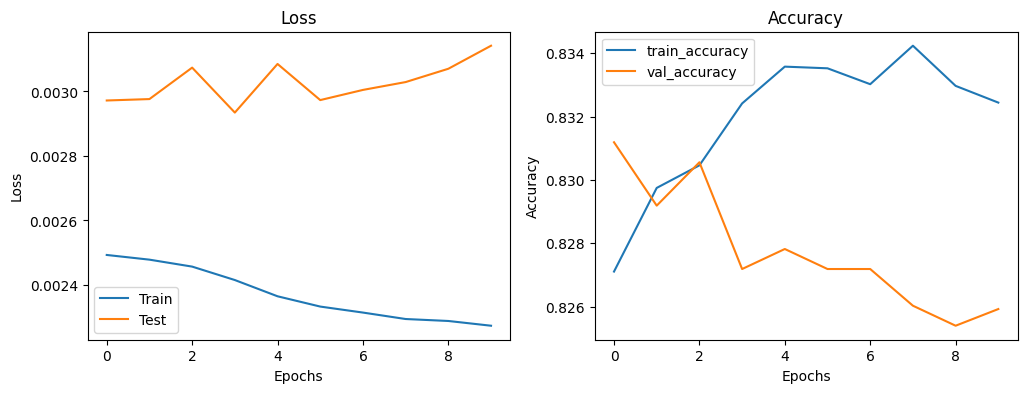

In [132]:
# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Test')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='train_accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

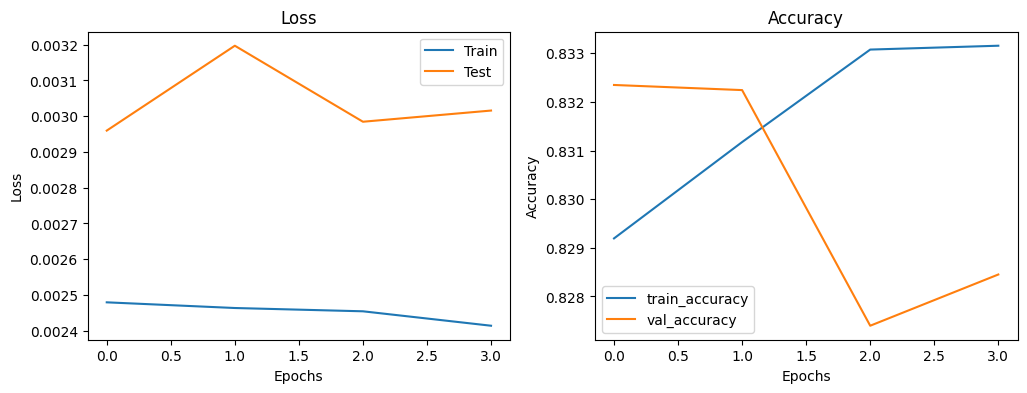

In [135]:
# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Test')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='train_accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [192]:
# Predict on both training and test data
train_predictions = autoencoder.predict(X_train)


# Calculate the reconstruction loss (Mean Squared Error) for both training and test data
train_loss = np.mean(np.power(X_train - train_predictions, 2), axis=1)


# Calculate the 99th percentile threshold based on training loss
threshold = np.percentile(train_loss, 99)
print("Calculated threshold based on 99th percentile:", threshold)
# threshold_fixed = 0.00014653  # Fixed threshold based on experimentation or further tuning

# Combine the training and test data reconstruction errors into one dataframe
error_df_train= pd.DataFrame({'Reconstruction_error': train_loss,
                         'True_class': Y_train})

anomalies = error_df_train[error_df_train['Reconstruction_error'] > threshold]
print(anomalies)

1187/1187 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step
Calculated threshold based on 99th percentile: 0.010044587546972785
       Reconstruction_error  True_class
39769              0.163982         0.0
45372              0.012534         0.0
3602               0.011245         0.0
174                0.010508         0.0
42700              0.090939         1.0
...                     ...         ...
7744               0.023454         0.0
42635              0.095616         1.0
10900              0.022423         0.0
7277               0.014401         0.0
10115              0.011534         0.0

[379 rows x 2 columns]


In [193]:
error_df_train['True_class'].count()

np.int64(37957)

In [194]:
anomalies['True_class'].count()

np.int64(379)

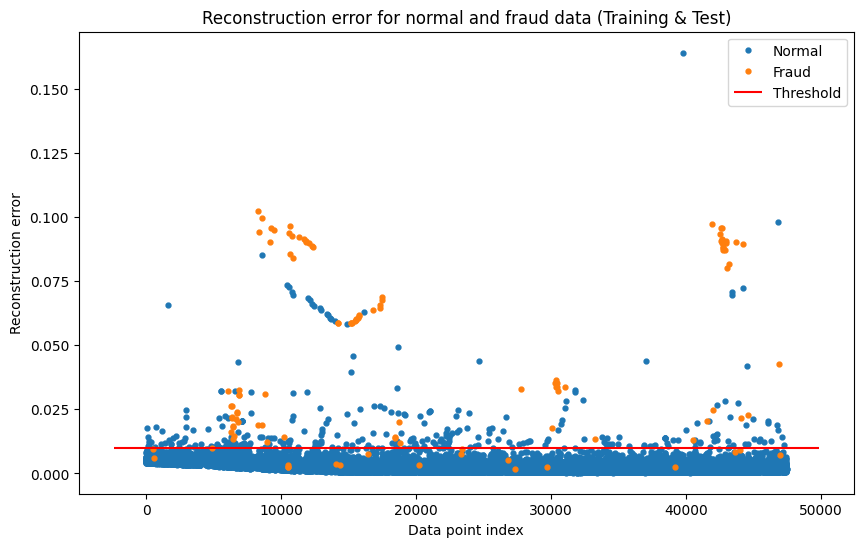

In [195]:
# Group by 'True_class' (0 for normal, 1 for fraud)
groups = error_df_train.groupby('True_class')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot training and test data reconstruction errors
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label="Fraud" if name == 1 else "Normal")

# Add threshold line to the plot
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')

# Add legend, labels, and title
ax.legend()
plt.title("Reconstruction error for normal and fraud data (Training & Test)")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

In [212]:
# Predict the reconstructed test data using the autoencoder
test_x_predictions = autoencoder.predict(X_test)

# Calculate the reconstruction error (mean squared error) for each sample
mse = np.mean(np.square(X_test - test_x_predictions), axis=1)

# Create a DataFrame to store reconstruction errors and true class labels
error_df = pd.DataFrame({'Reconstruction_error': mse, 'True_class': Y_test})

# Set a threshold to identify anomalies (e.g., using the 95th percentile of reconstruction error)
threshold_test = np.percentile(mse, 99)

# Identify the anomalies (samples with reconstruction error above the threshold)
anomalies = error_df[error_df['Reconstruction_error'] > threshold]

# Print the anomalies
print(error_df)
print(anomalies)
print(threshold)


297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
       Reconstruction_error  True_class
25582              0.000983         0.0
23792              0.001012         0.0
10773              0.002871         0.0
43427              0.001304         0.0
6898               0.003906         0.0
...                     ...         ...
5749               0.007773         0.0
39830              0.001845         0.0
2069               0.004577         0.0
32696              0.002974         0.0
3210               0.004684         0.0

[9490 rows x 2 columns]
       Reconstruction_error  True_class
19914              0.011268         0.0
6971               0.014787         1.0
17407              0.066552         1.0
15465              0.014160         0.0
13833              0.059907         0.0
...                     ...         ...
12698              0.014579         0.0
34789              0.015621         0.0
4840               0.010969         0.0
36855              0.010447         0.0
45203         

In [209]:
test_anomalies.count()

np.int64(9490)

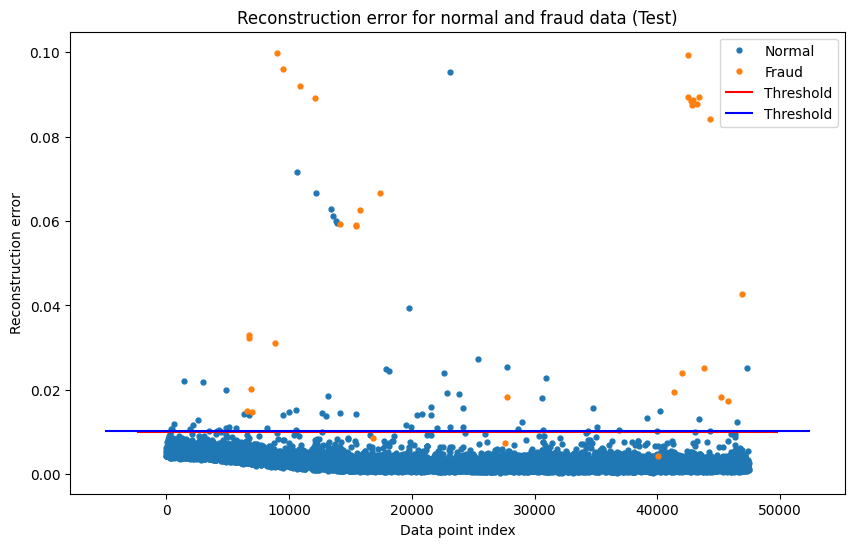

In [198]:
# Group by 'True_class' (0 for normal, 1 for fraud)
groups = error_df.groupby('True_class')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot training and test data reconstruction errors
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label="Fraud" if name == 1 else "Normal")

# Add threshold line to the plot
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.hlines(threshold_test, ax.get_xlim()[0], ax.get_xlim()[1], colors="b", zorder=100, label='Threshold')

# Add legend, labels, and title
ax.legend()
plt.title("Reconstruction error for normal and fraud data (Test)")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


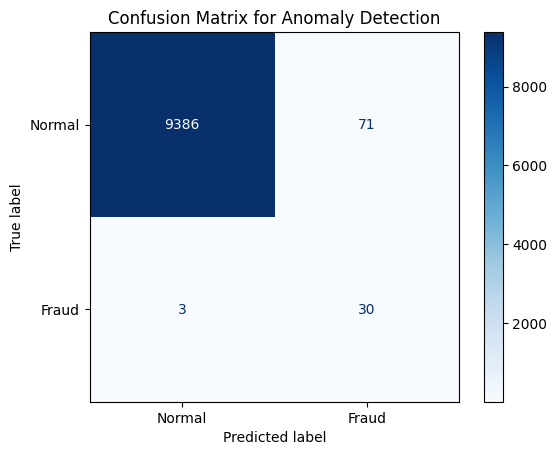

In [214]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Classify predictions based on threshold
test_predictions = autoencoder.predict(X_test)
test_mse = np.mean(np.power(X_test - test_predictions, 2), axis=1)
test_anomalies = test_mse > threshold

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, test_anomalies)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Normal", "Fraud"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Anomaly Detection")
plt.show()


In [215]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate evaluation metrics
accuracy = accuracy_score(test_labels, test_anomalies)
precision = precision_score(test_labels, test_anomalies)
recall = recall_score(test_labels, test_anomalies)
f1 = f1_score(test_labels, test_anomalies)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9922
Precision: 0.2970
Recall: 0.9091
F1 Score: 0.4478
